In [1]:
!hostname

rubensolozabal-MSI


In [2]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('datasets/ETS1/dataset_ETS1_encoded.csv')

In [5]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,0.230935,ATGCCGGAAATGT,ATTTCCGGCACTA,"[['A', 'D', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'n', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
1,AA,2,0.194506,GAGCCGGAAATGT,ATTTCCGGCACAA,"[['A', 'A', 'D', 'A'], ['A', 'D', 'D', 'A'], [...","[['A', 'D', 'n', 'A'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,0.092728,GTACCGGAAATGT,ATTTCCGGCAATA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
3,AA,4,-1.213462,GTGACGGAAATGT,ATTTCCGGCACTA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
4,AA,5,-2.167496,GTGCAGGAAATGT,ATTTCCGGAACTA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
...,...,...,...,...,...,...,...
1256,gg,9,-2.383836,GTGCCGGAgATGT,ATTTgCGGCACTA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
1257,gg,10,-2.227826,GTGCCGGAAgTGT,ATTgCCGGCACTA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
1258,gg,11,-2.048018,GTGCCGGAAAgGT,ATgTCCGGCACTA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."
1259,gg,12,-0.128979,GTGCCGGAAATgT,AgTTCCGGCACTA,"[['A', 'A', 'D', 'A'], ['M', 'A', 'A', 'M'], [...","[['A', 'D', 'n', 'A'], ['x', 'A', 'A', 'x'], [..."


In [6]:
# Take sample 0 form the df
sample_0 = df.iloc[0]

In [7]:
import ast

# Get the Groove_major concat Groove minor array
major_groove = sample_0['Groove_major']
minor_groove = sample_0['Groove_minor']


# Convert to numpy array
major_groove = np.array(ast.literal_eval(major_groove))
minor_groove = np.array(ast.literal_eval(minor_groove))

groove_concat = np.concatenate([major_groove, minor_groove], axis=1)

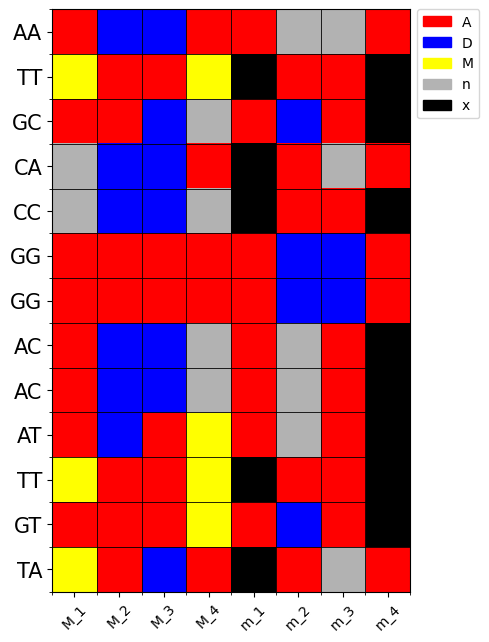

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from src.constants import COLOR_FG


n_rows, n_cols = groove_concat.shape
color_img = np.array([[COLOR_FG.get(v, (0, 0, 0)) for v in row] for row in groove_concat], dtype=float)

# keep the structure but visualize only groove_concat
n = 1
color_imgs = [color_img]
bps_list = [list(sample_0['Plus_strand'])]

# use antiparallel pairing: minus base at index len-1-i
minus_bases = list(sample_0['Minus_strand'])[::-1]
pair_labels = [p + m for p, m in zip(bps_list[0], minus_bases)]

fig, axes = plt.subplots(1, n, figsize=(5*n, 30), squeeze=False)
axes = axes.ravel()

for k, ax in enumerate(axes):
    ax.imshow(color_imgs[k], aspect='equal', origin='upper', interpolation='nearest')

    # black grid lines between cells
    ax.set_xticks(np.arange(-0.5, n_cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n_rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.6)
    ax.set_axisbelow(False)

    # align grid
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(n_rows - 0.5, -0.5)

    # ticks
    ax.set_xticks(range(n_cols))
    ax.set_xticklabels(['M_1','M_2','M_3','M_4','m_1','m_2','m_3','m_4'], fontsize=10, rotation=45)

    ax.set_yticks(range(0, n_rows))
    ax.set_yticklabels(pair_labels, fontsize=15)

# legend on the last axis
legend_handles = [Patch(color=COLOR_FG[k], label=k) for k in ['A', 'D', 'M', 'n', 'x']]
axes[-1].legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()

# Save figure as pdf
plt.savefig('plots/ETS1_sample0_groove_encoding.pdf', bbox_inches='tight')